In [1]:
import networkx as nx

# NetworkX
## Graph
NetworkX 提供了多个类来存储不同类型的图形，例如有向图和无向图。它还提供了用于创建多重图（有向和无向）的类。

In [2]:
# Create an undirected graph G
G = nx.Graph()
print(G.is_directed())

# Create a directed graph H
H = nx.DiGraph()
print(H.is_directed())

# Add graph level attribute
G.graph["Name"] = "Bar"
print(G.graph)

False
True
{'Name': 'Bar'}


In [3]:
# Add one node with node level attributes
G.add_node(0, feature=5, label=0)

# Get attributes of the node 0
node_0_attr = G.nodes[0]
print("Node 0 has the attributes {}".format(node_0_attr))

Node 0 has the attributes {'feature': 5, 'label': 0}


In [4]:
G.nodes(data=True)

NodeDataView({0: {'feature': 5, 'label': 0}})

In [5]:
# Add multiple nodes with attributes
G.add_nodes_from([
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2})
]) #(node, attrdict)

# Loop through all the nodes
# Set data=True will return node attributes
for node in G.nodes(data=True):
  print(node)

# Get number of nodes
num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

(0, {'feature': 5, 'label': 0})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})
G has 3 nodes


In [6]:
# Add one edge with edge weight 0.5
G.add_edge(0, 1, weight=0.5)

# Get attributes of the edge (0, 1)
edge_0_1_attr = G.edges[(0, 1)]
print("Edge (0, 1) has the attributes {}".format(edge_0_1_attr))

Edge (0, 1) has the attributes {'weight': 0.5}


In [7]:
# Add multiple edges with edge weights
G.add_edges_from([
  (1, 2, {"weight": 0.3}),
  (2, 0, {"weight": 0.1})
])

# Loop through all the edges
# Here there is no data=True, so only the edge will be returned
for edge in G.edges():
  print(edge)

# Get number of edges
num_edges = G.number_of_edges()
print("G has {} edges".format(num_edges))

(0, 1)
(0, 2)
(1, 2)
G has 3 edges


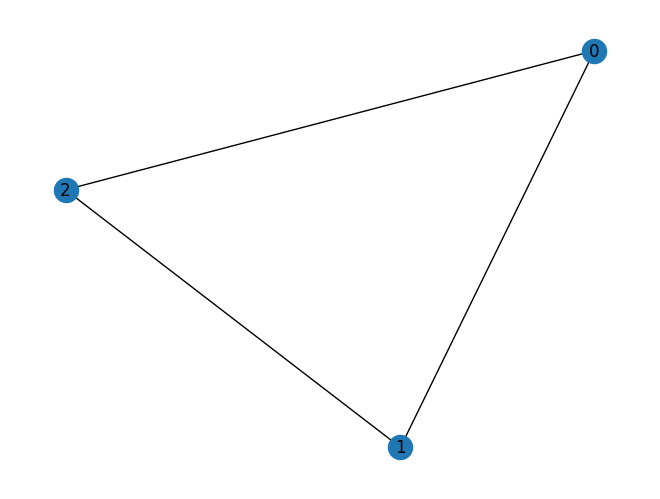

In [8]:
# Draw the graph
nx.draw(G, with_labels = True)

In [9]:
node_id = 1

# Degree of node 1
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

# Get neighbor of node 1
for neighbor in G.neighbors(node_id):
  print("Node {} has neighbor {}".format(node_id, neighbor))

Node 1 has degree 2
Node 1 has neighbor 0
Node 1 has neighbor 2


In [10]:
nx.path_graph(num_nodes)

{0: 0.17857162031103999,
 1: 0.32142837968896,
 2: 0.32142837968896,
 3: 0.17857162031103999}

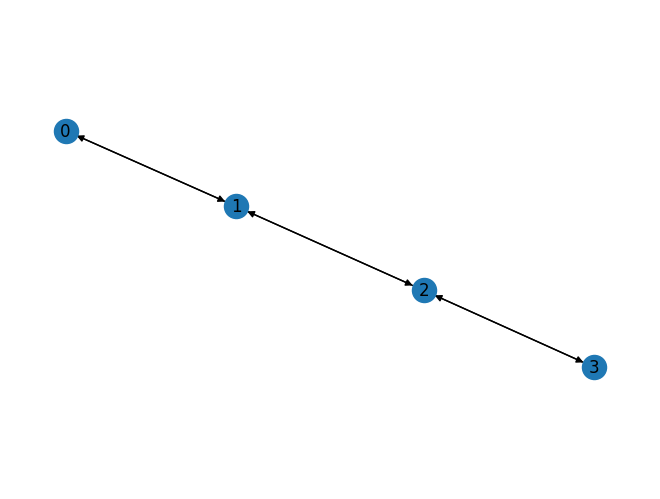

In [11]:
num_nodes = 4
# Create a new path like graph and change it to a directed graph
G = nx.DiGraph(nx.path_graph(num_nodes))
nx.draw(G, with_labels = True)

# Get the PageRank
pr = nx.pagerank(G, alpha=0.8)
pr

# PyTorch Geometric

最近，图上的深度学习已成为深度学习社区中最热门的研究领域之一。在这里，图神经网络 （GNN） 旨在将经典的深度学习概念推广到不规则结构化的数据（与图像或文本相反），并使神经网络能够推理对象及其关系
本教程将向您介绍有关通过基于 PyTorch Geometric （PyG） 库的图形神经网络对图形进行深度学习的一些基本概念。PyTorch Geometric 是流行的深度学习框架 PyTorch 的扩展库，由各种方法和实用程序组成，以简化图形神经网络的实现。
在 Kipf 等人（2017 年）之后，让我们通过一个简单的图形结构示例，即著名的 Zachary's 空手道俱乐部网络，深入了解 GNN 的世界。此图表描述了一个由空手道俱乐部的 34 名成员组成的社交网络，并记录了在俱乐部外互动的成员之间的联系。在这里，我们感兴趣的是检测由成员互动产生的社区。

In [25]:
# Helper function for visualization.
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt

# Visualization function for NX graph or PyTorch tensor
def visualize(h, color, epoch=None, loss=None, accuracy=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        # 设置label
        if epoch is not None and loss is not None and accuracy['train'] is not None and accuracy['val'] is not None:
            plt.xlabel((f'Epoch: {epoch}, Loss: {loss.item():.4f} \n'
                       f'Training Accuracy: {accuracy["train"]*100:.2f}% \n'
                       f' Validation Accuracy: {accuracy["val"]*100:.2f}%'),
                       fontsize=16)
    else:
        nx.draw_networkx(h, pos=nx.spring_layout(h, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

In [13]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


In [14]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.has_isolated_nodes()}')
print(f'Contains self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Number of training nodes: 4
Training node label rate: 0.12
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


## Data

PyTorch Geometric 中的图形数据对象是由 `torch_geometric.data.Data` 类定义的。这个类的实例将包含一个图形的所有信息，例如节点特征，边索引，目标等。让我们看看空手道俱乐部图的数据对象。

In [16]:
data

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])

我们可以看到这个 data 对象包含 4 个属性：

（1） 该 edge_index 属性包含有关图连通性的信息，即每条边的源节点索引和目标节点索引的元组。PyG 进一步将 （2） 节点特征称为 x （34 个节点中的每个节点都分配了一个 34 维的特征向量），并将 （3） 节点标签称为 y （每个节点只分配给一个类）。（4） 还有一个名为 train_mask 的附加属性，
它描述了我们已经知道哪些节点的社区分配。总的来说，我们只知道 4 个节点的 ground-truth 标签（每个社区一个），任务是推断其余节点的社区分配

In [18]:
data.x

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])

这种表示形式称为 COO 格式（坐标格式），通常用于表示稀疏矩阵。PyG 不是以密集表示  A∈{0,1}|V|×|V|  形式保存邻接信息，而是稀疏地表示图形，这是指仅保存 in  A  中的条目为非零的坐标/值。

In [20]:
data.edge_index.t()

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

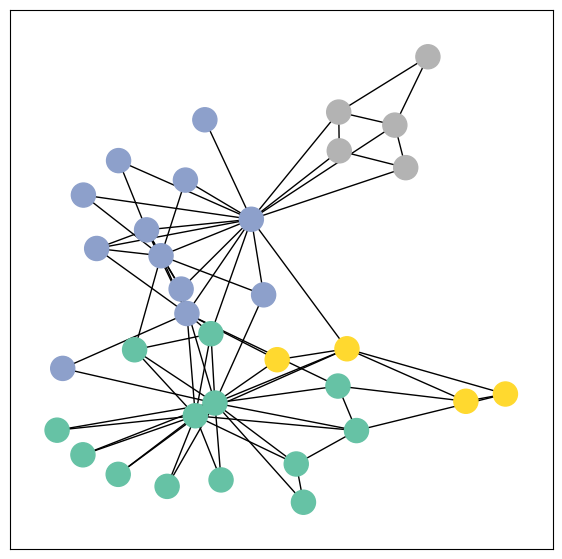

In [24]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)

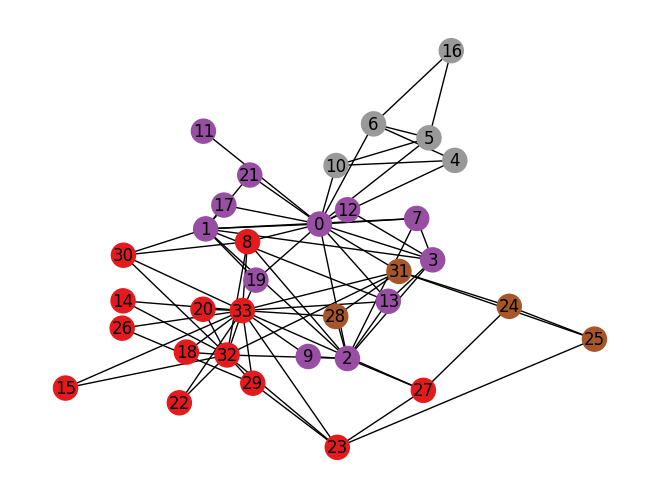

In [40]:
import networkx as nx

nx_G = nx.karate_club_graph()
pos = nx.kamada_kawai_layout(nx_G)
colors = data.y
nx.draw(nx_G, pos, with_labels=True, node_color=colors, cmap=plt.cm.Set1)


## Implementing Graph Neural Networks (GNNs)

PyG 通过 GCNConv 实现此层，这可以通过传入节点特征表示 x 和 COO 图连接表示 edge_index 来执行。

GNN 的目标是采用一个输入图 $G = (V, E)$，其中 $V$ 是节点集合，$E$ 是边集合，其中每个节点 $v_i \in V$ 具有特征表示 $x_i ^{(0)}$. 

我们想要学习的是 function $f: V \times R^{d1} \rightarrow R^{d2}$，其中 $d1$ 是输入特征的维度，$d2$ 是输出特征的维度。

它接受一个节点及其特征向量，以及图形结构，并输出一个 embedding，一个以对我们的下游任务有用的方式表示该节点的向量。一旦我们将节点及其初始特征映射到它们学习的嵌入向量，我们就可以使用这些嵌入向量来执行各种不同的任务，包括节点级、边缘级或图形级回归/分类。

In [26]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.

        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


Embedding shape: torch.Size([34, 2])


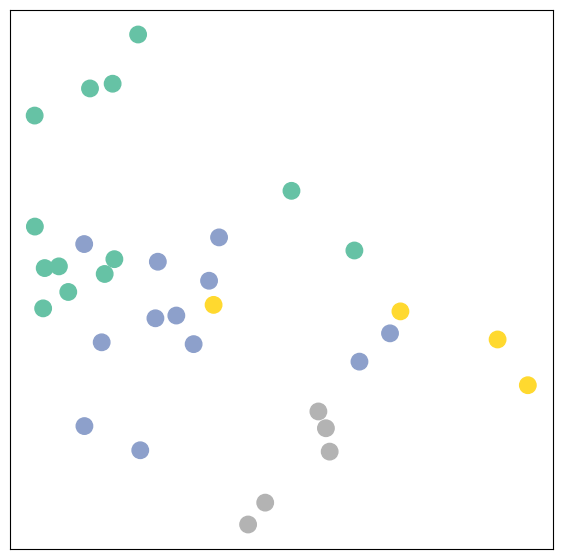

In [43]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {h.shape}')

visualize(h, color=data.y)

In [28]:
data.x

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])

<IPython.core.display.Javascript object>

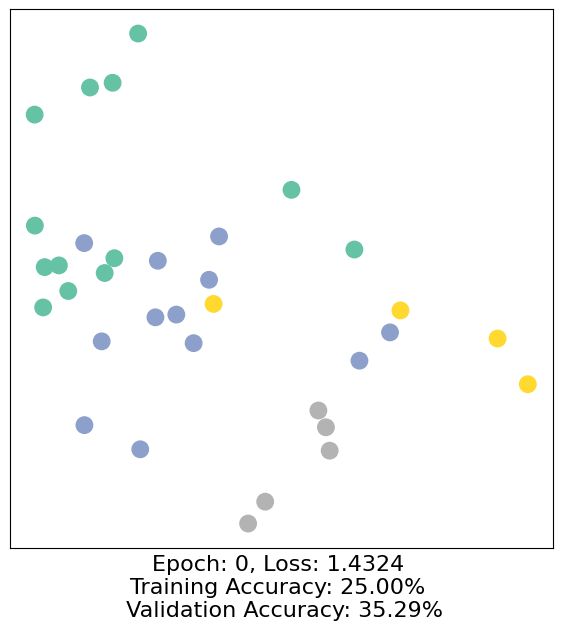

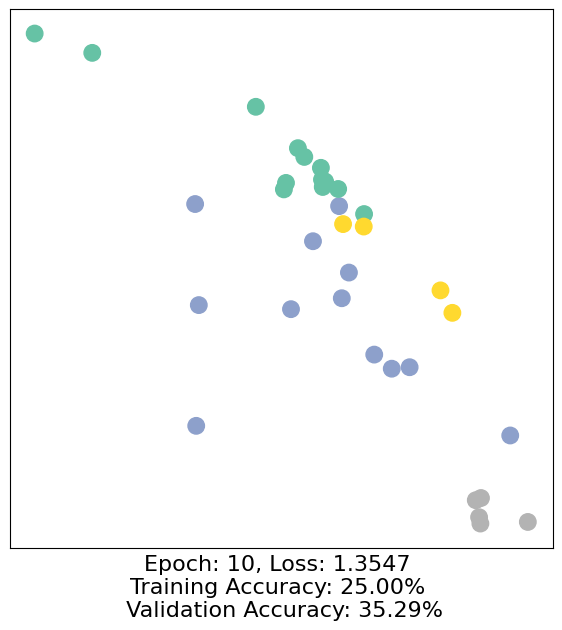

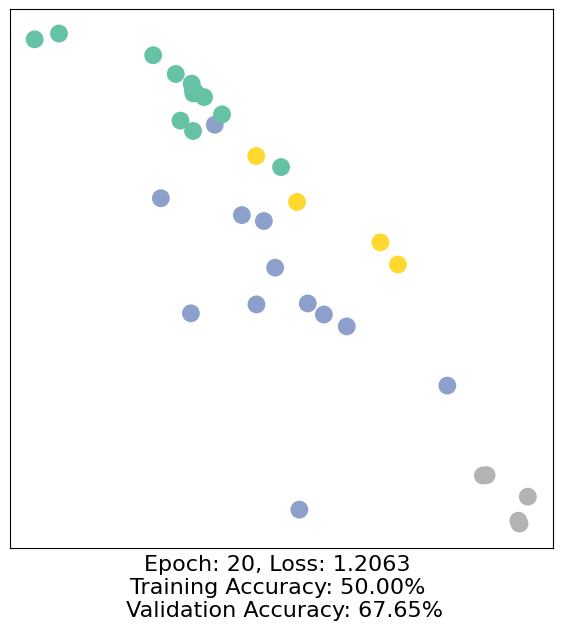

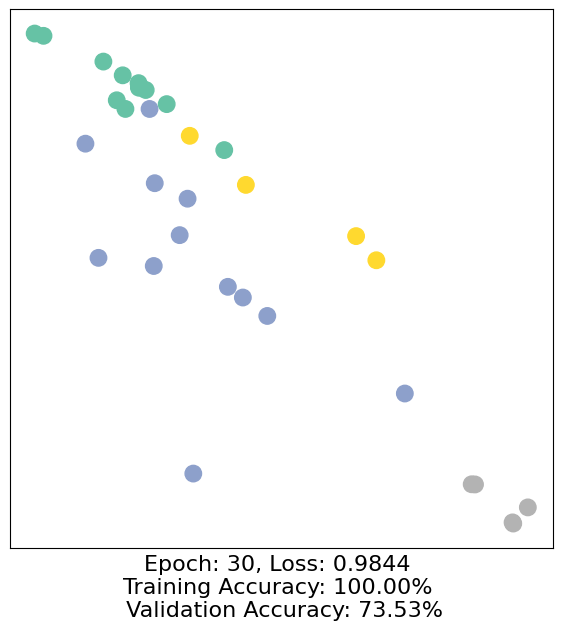

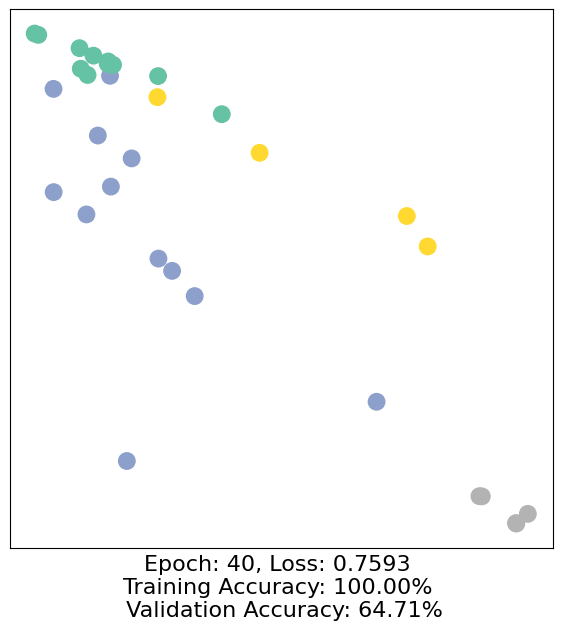

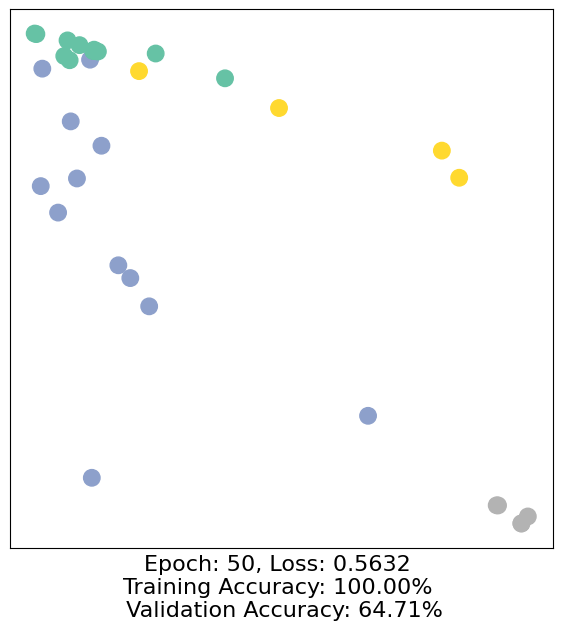

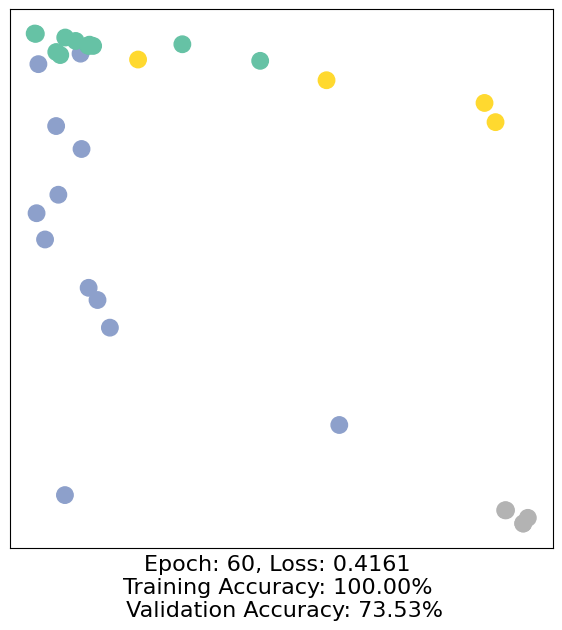

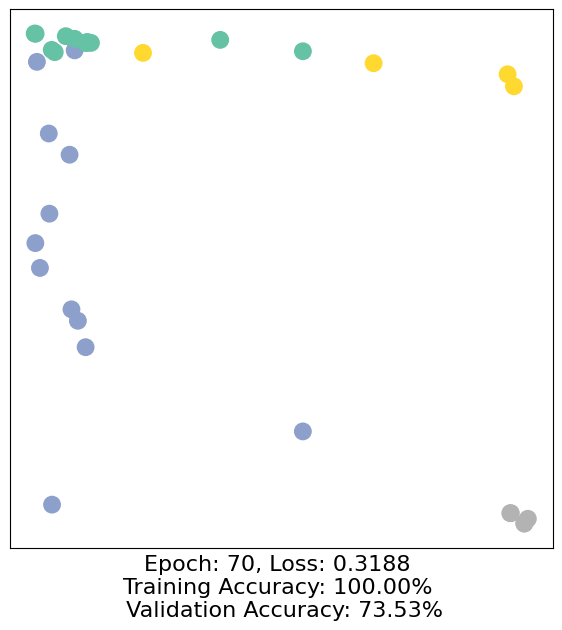

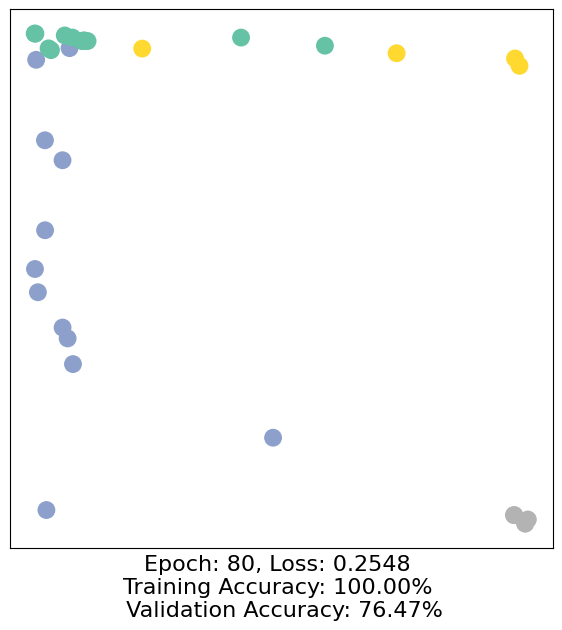

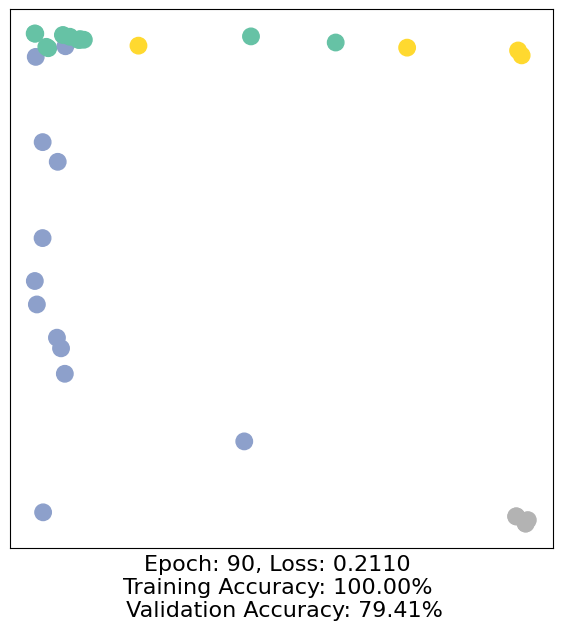

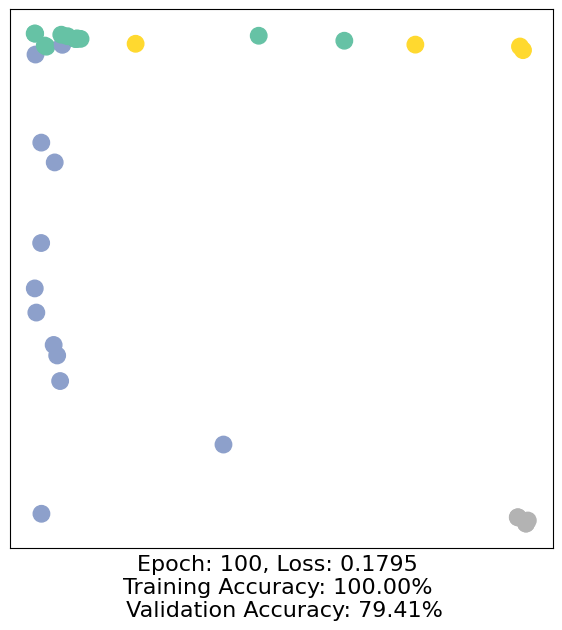

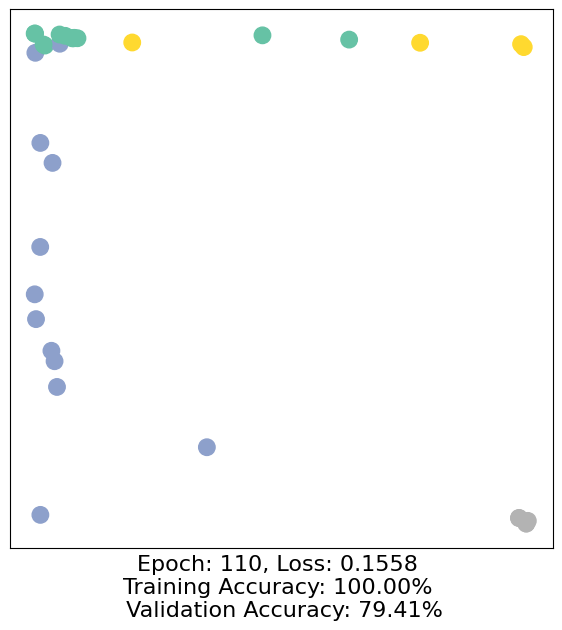

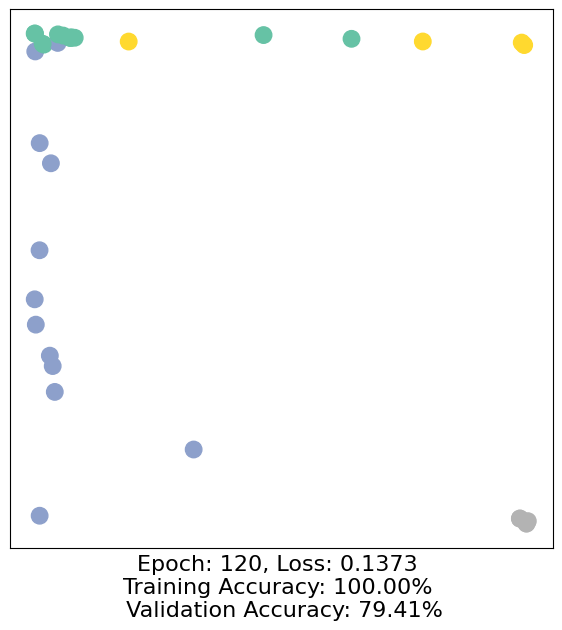

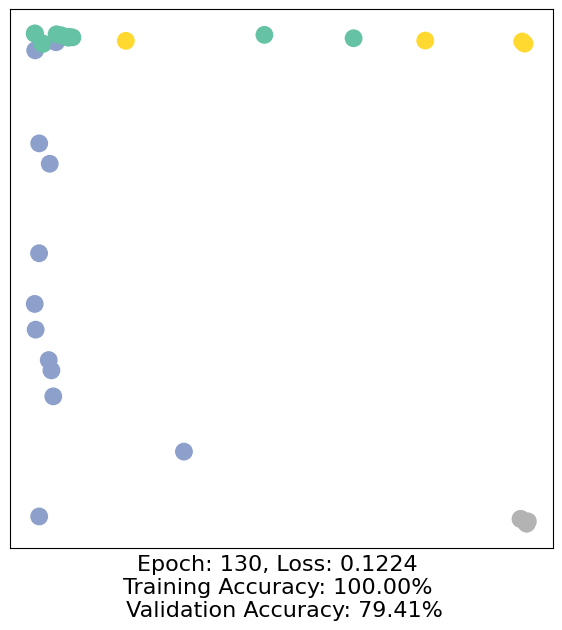

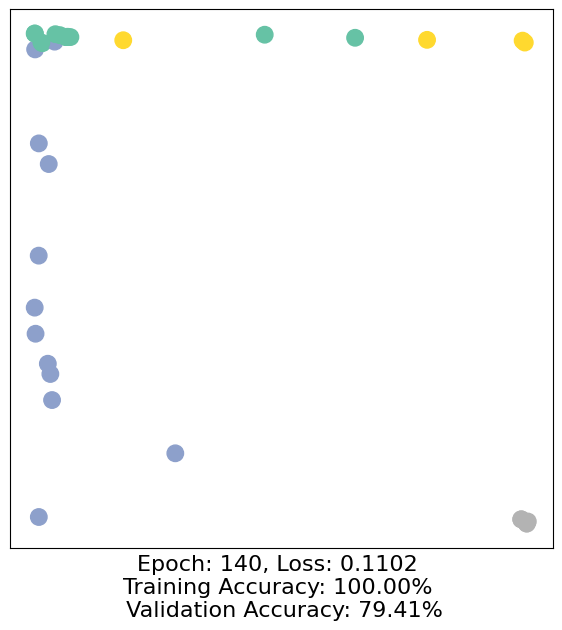

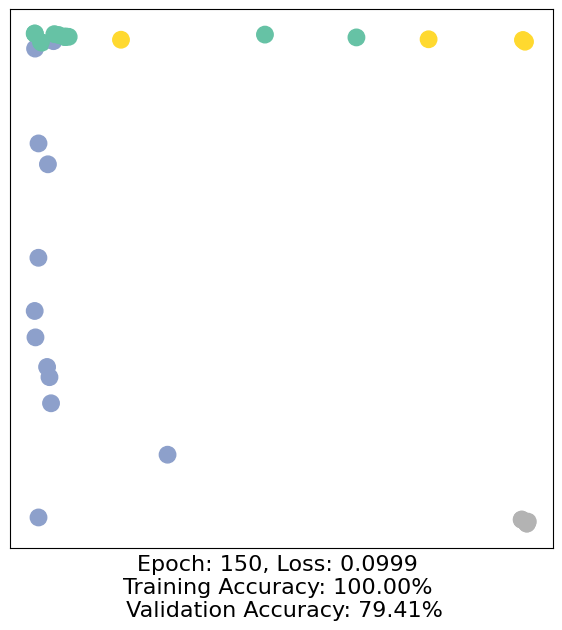

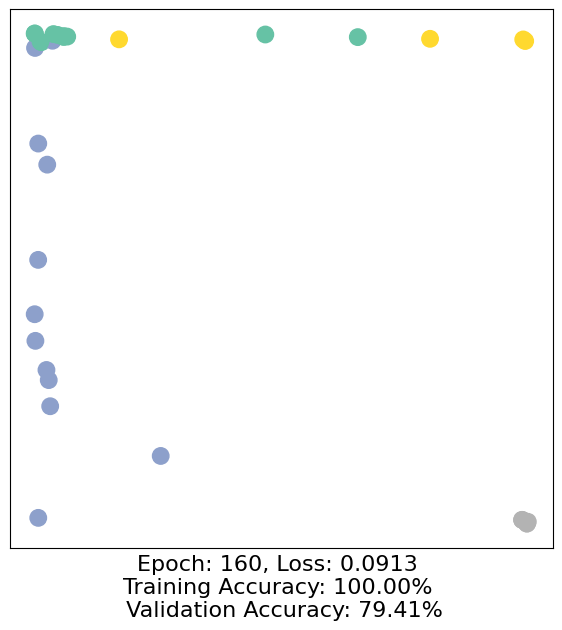

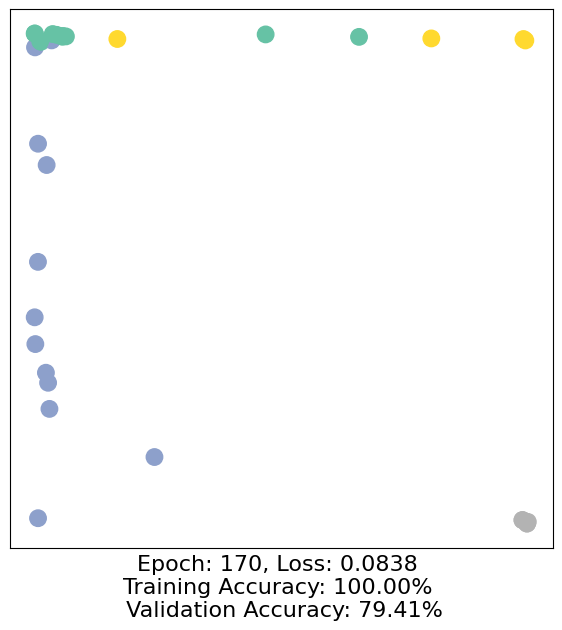

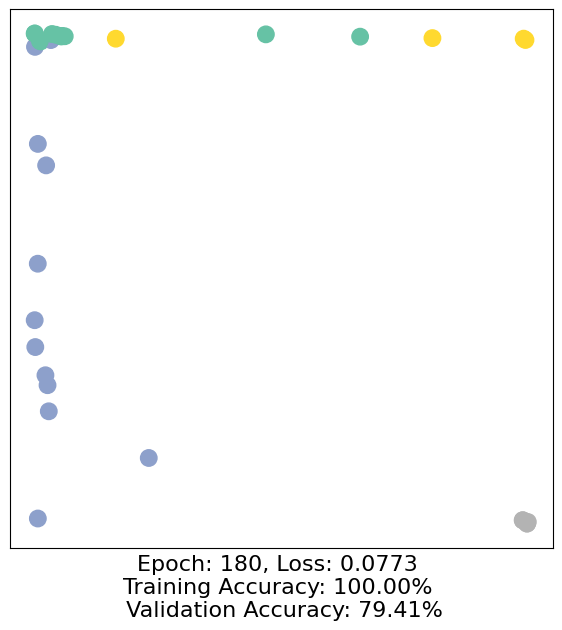

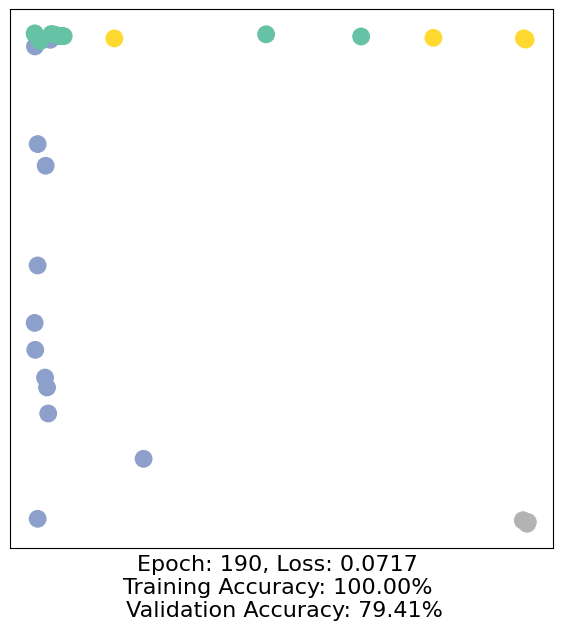

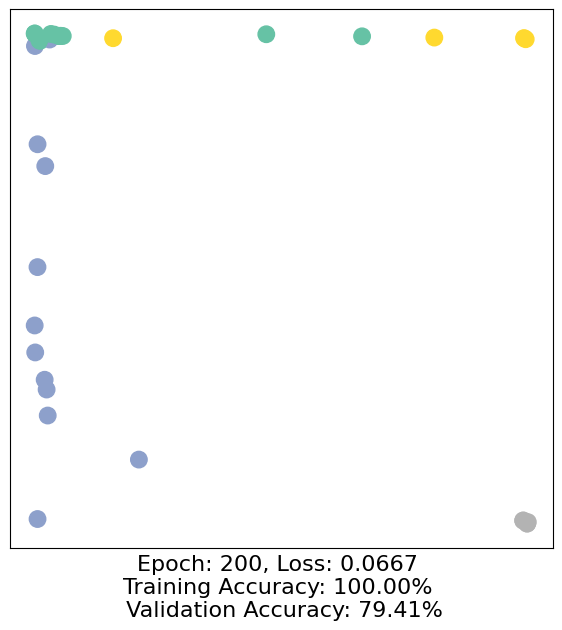

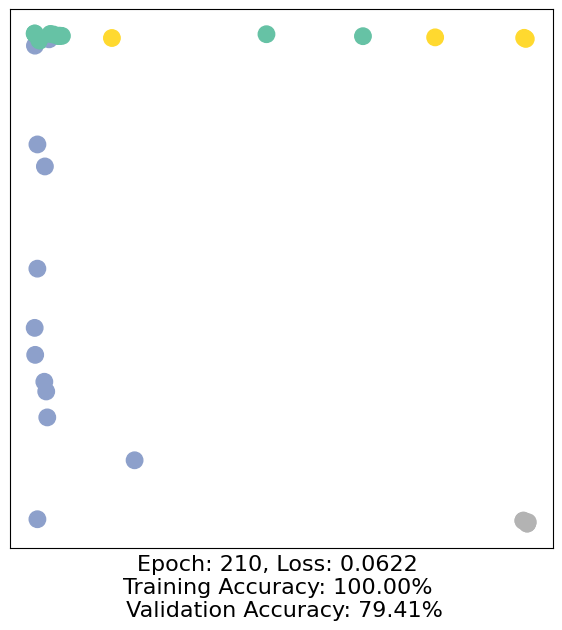

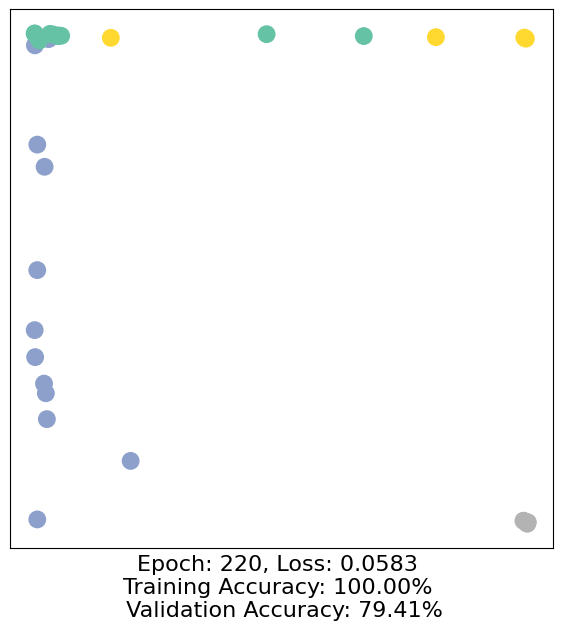

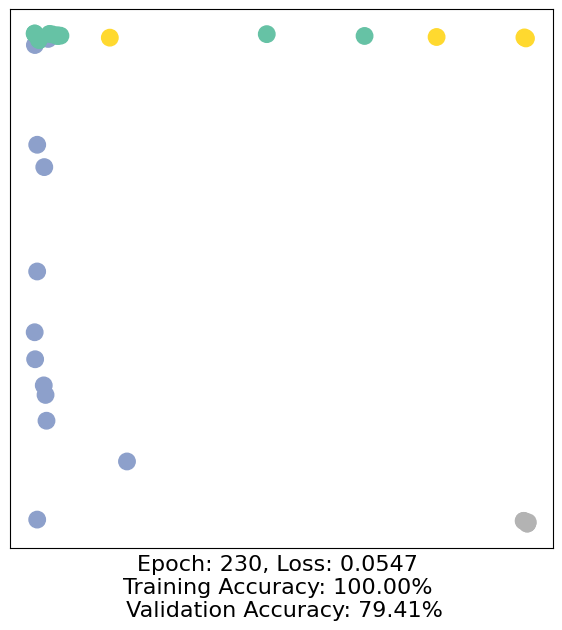

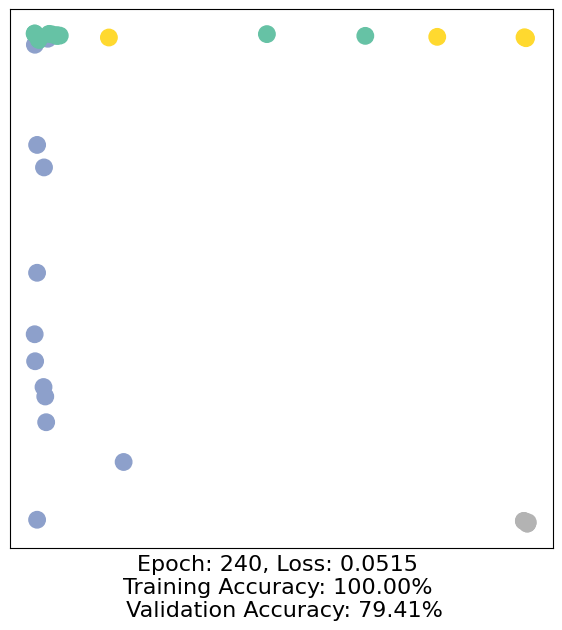

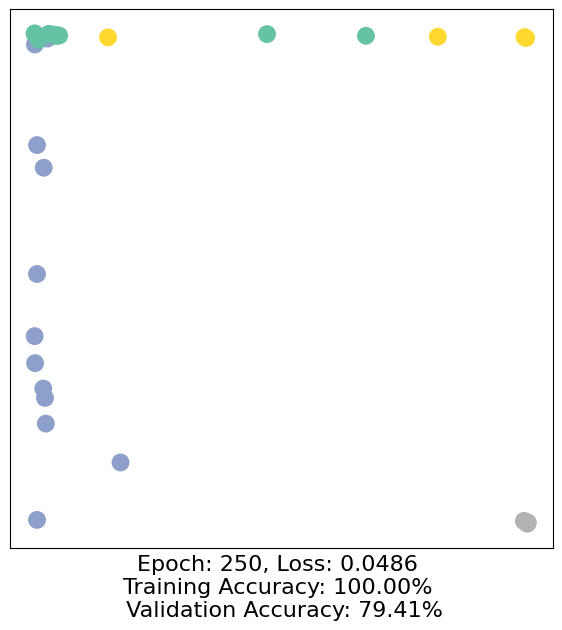

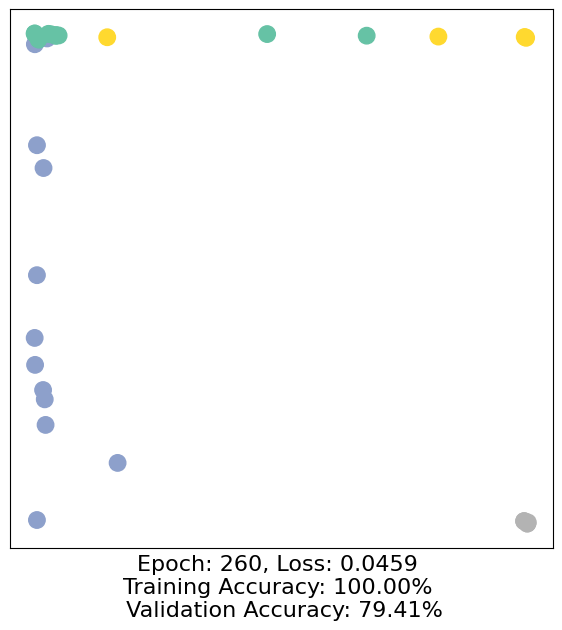

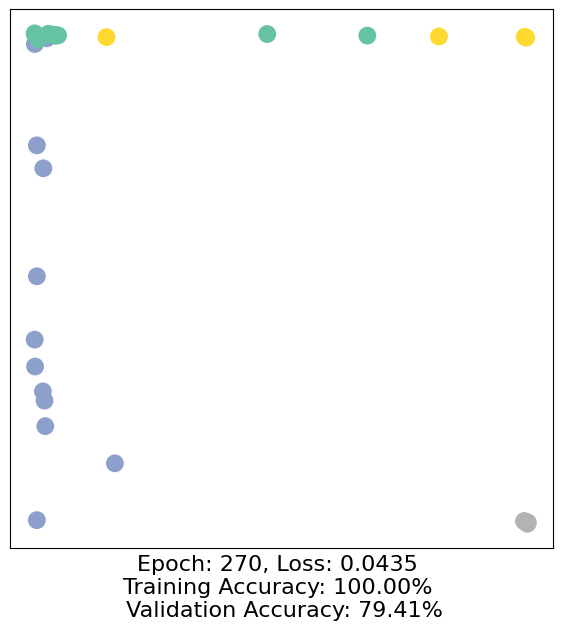

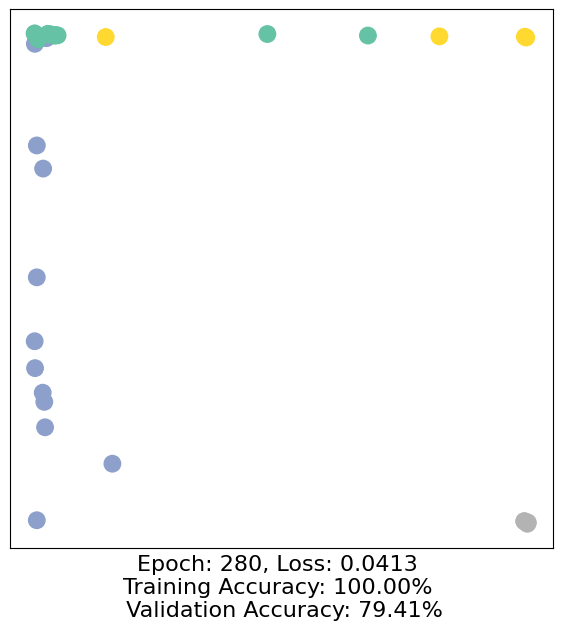

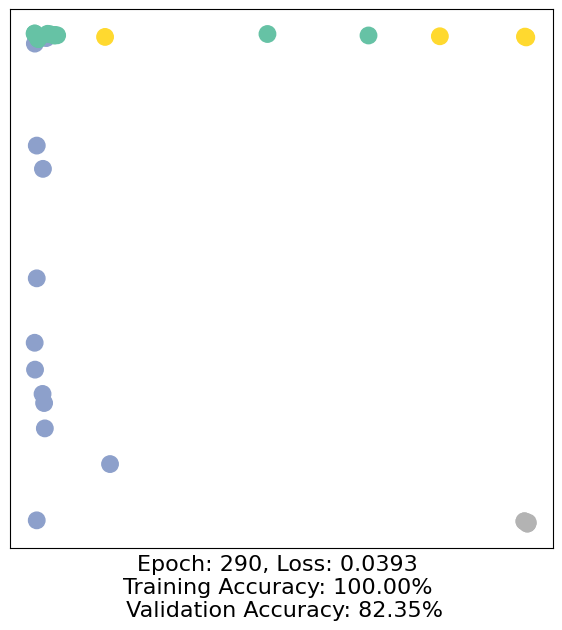

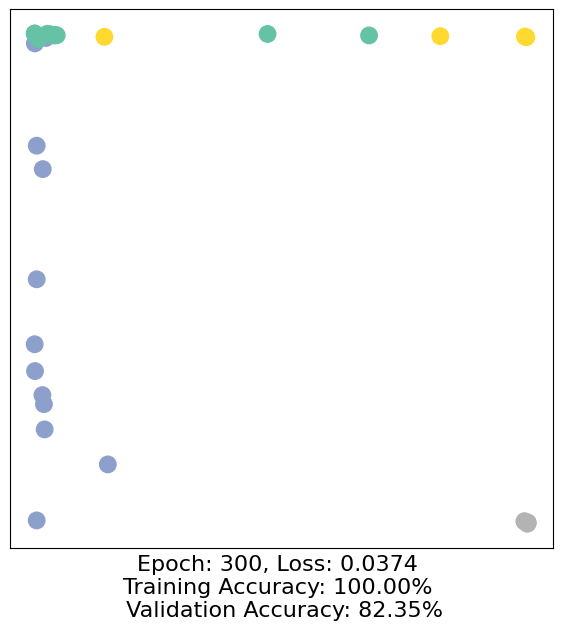

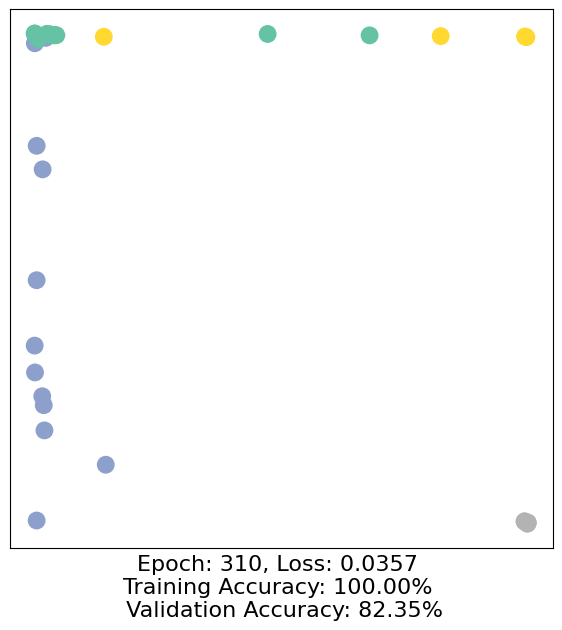

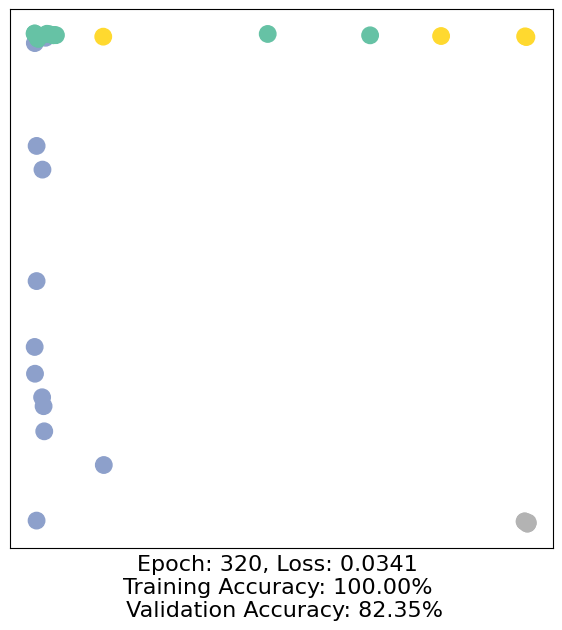

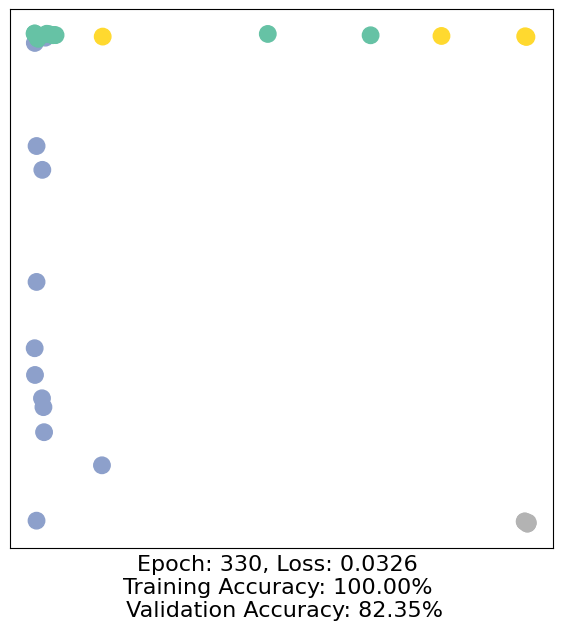

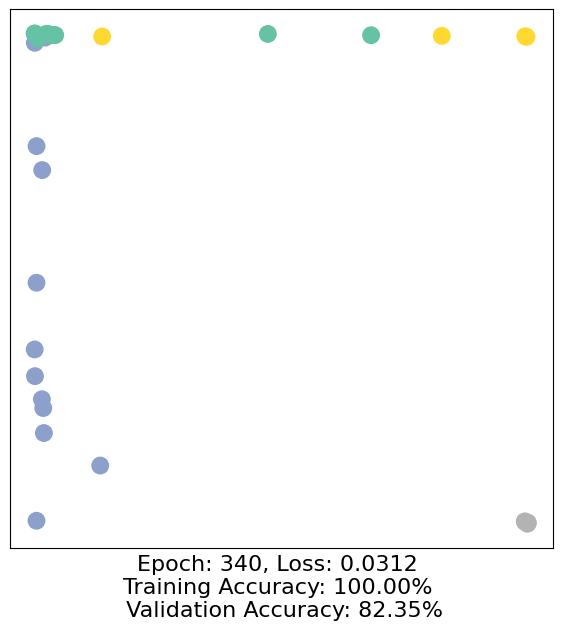

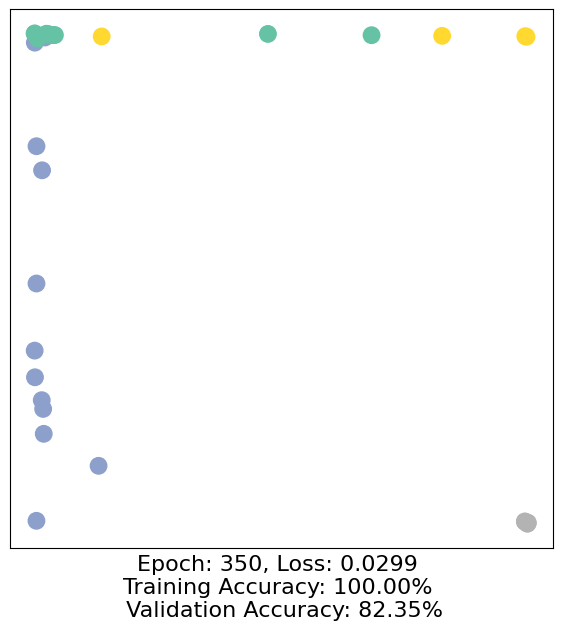

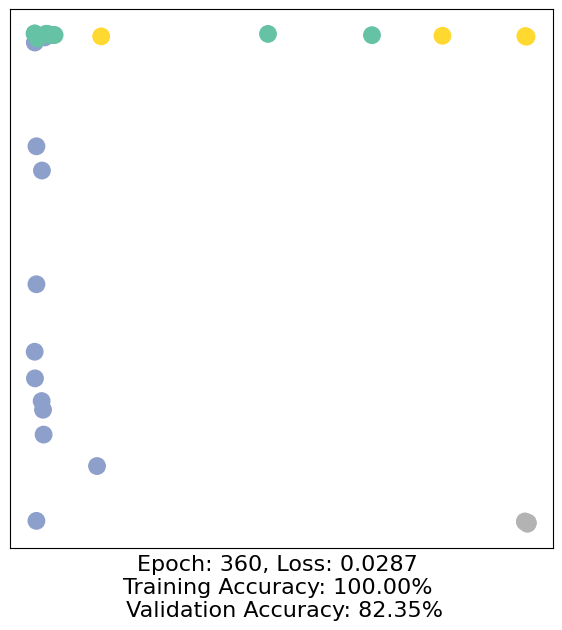

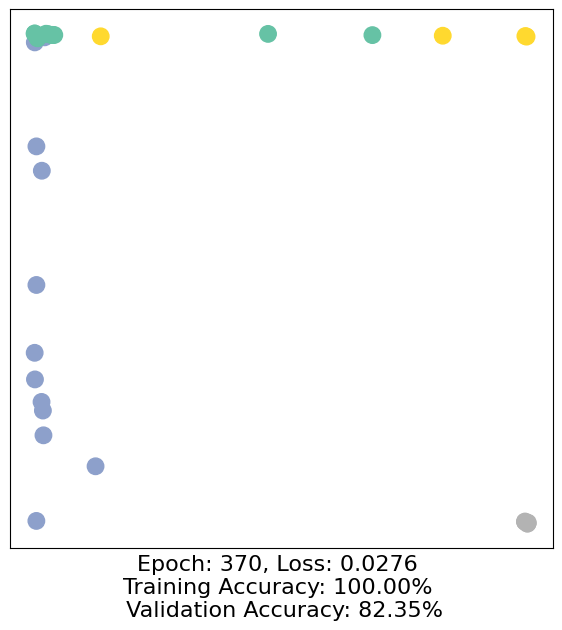

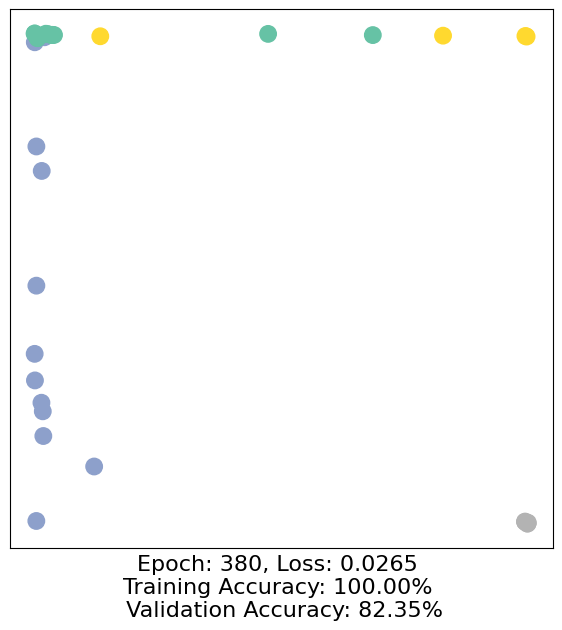

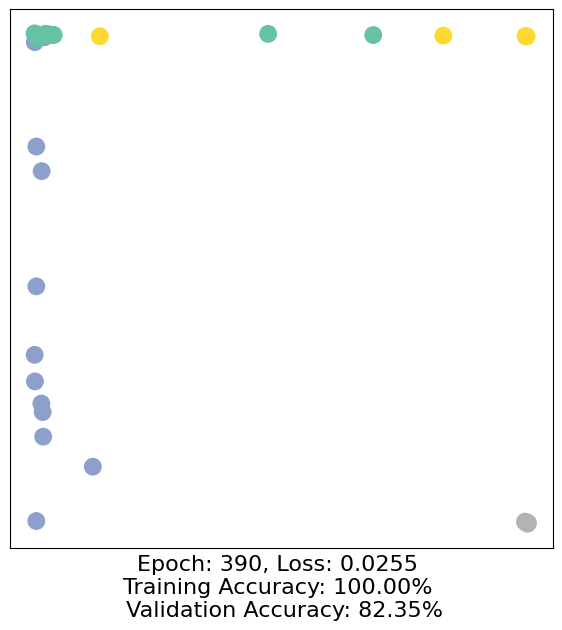

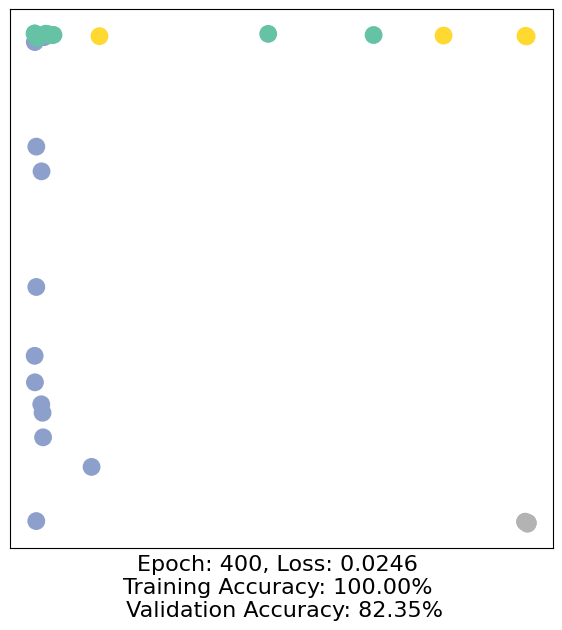

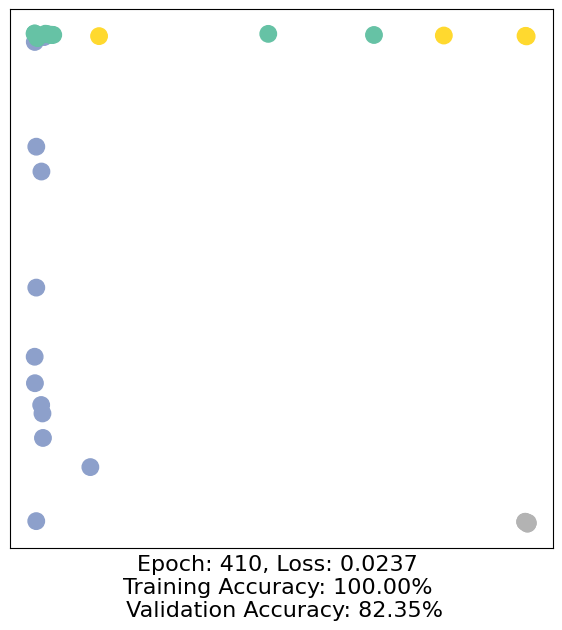

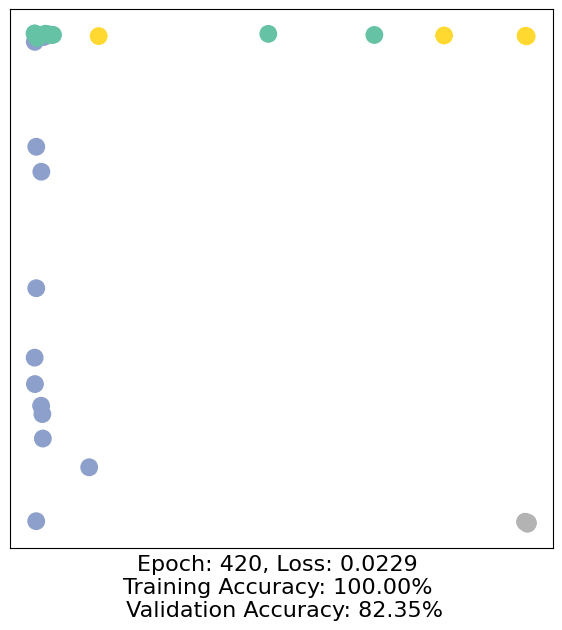

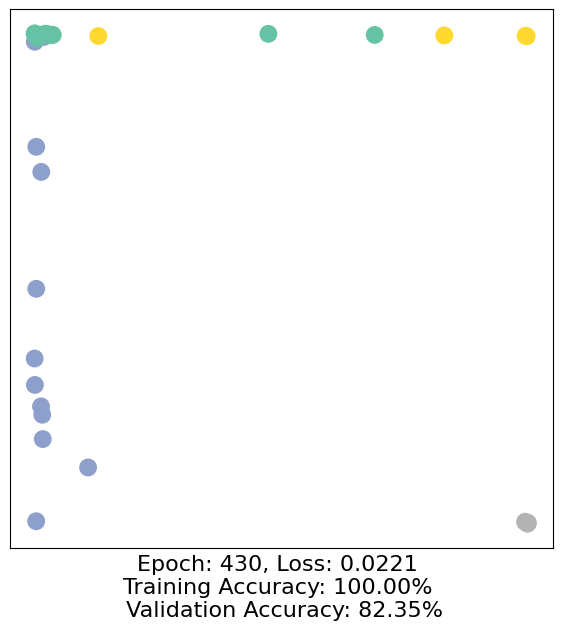

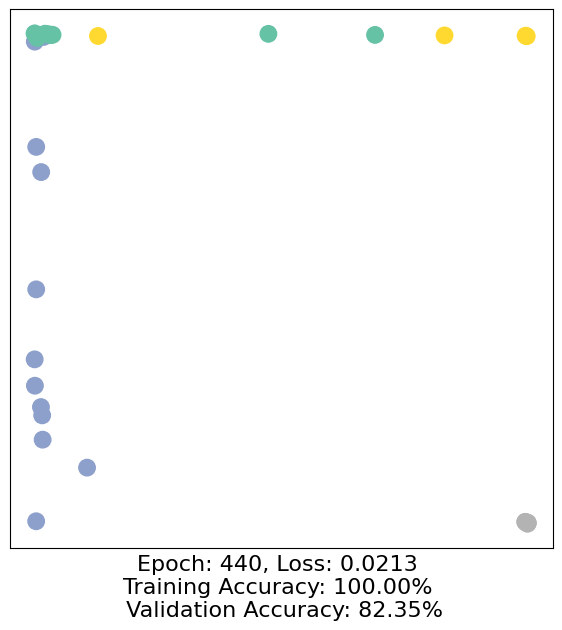

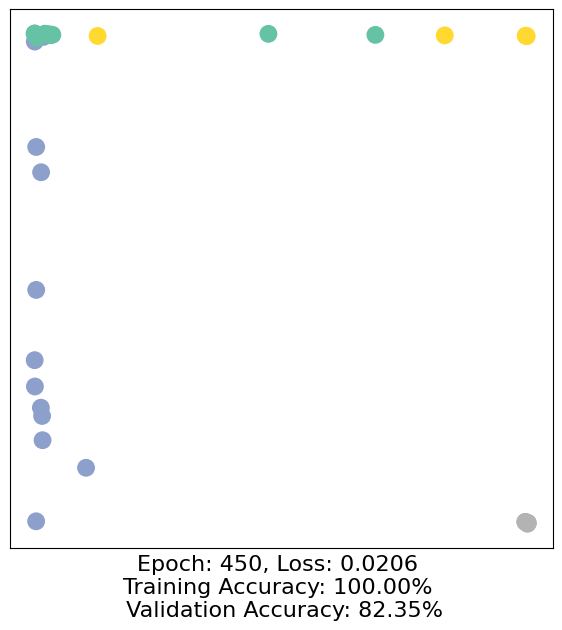

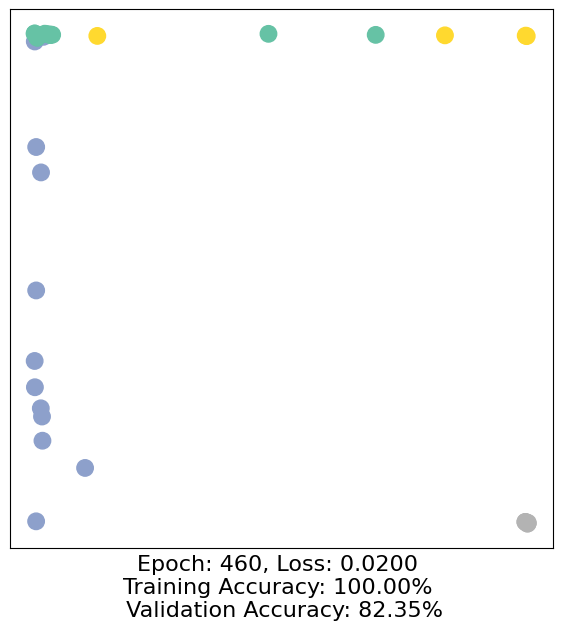

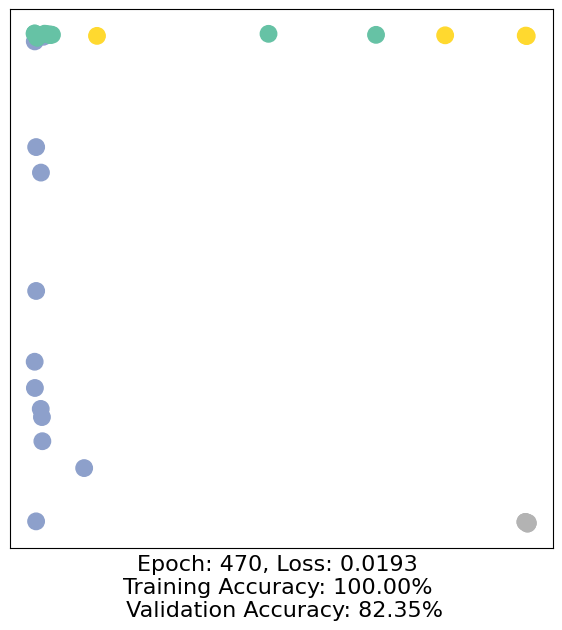

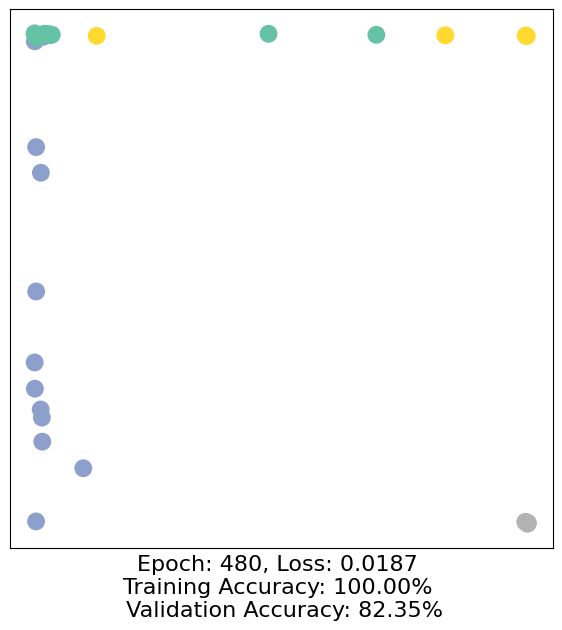

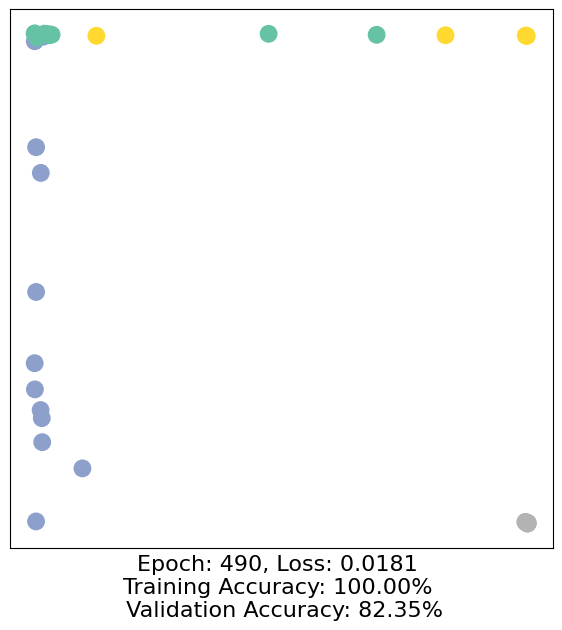

In [41]:
import time

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.

    accuracy = {}
    # Calculate training accuracy on our four examples
    predicted_classes = torch.argmax(out[data.train_mask], axis=1) # [0.6, 0.2, 0.7, 0.1] -> 2
    target_classes = data.y[data.train_mask]
    accuracy['train'] = torch.mean(
        torch.where(predicted_classes == target_classes, 1, 0).float())

    # Calculate validation accuracy on the whole graph
    predicted_classes = torch.argmax(out, axis=1)
    target_classes = data.y
    accuracy['val'] = torch.mean(
        torch.where(predicted_classes == target_classes, 1, 0).float())

    return loss, h, accuracy

for epoch in range(500):
    loss, h, accuracy = train(data)
    # Visualize the node embeddings every 10 epochs
    if epoch % 10 == 0:
        visualize(h, color=data.y, epoch=epoch, loss=loss, accuracy=accuracy)
        time.sleep(0.3)